In [1]:
import numpy as np

In [2]:
import json

In [3]:
with open('../_data/train.json', 'r') as f:
    train = json.load(f)

In [4]:
with open('../_data/test.json', 'r') as f:
    test = json.load(f)

In [5]:
len(train), len(test)

(39774, 9944)

In [6]:
train[0]

{'cuisine': 'greek',
 'id': 10259,
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [7]:
from collections import Counter

In [8]:
ingr_train = Counter()
cuisines_train = Counter()

In [9]:
ingr_test = Counter()
cuisines_test = Counter()

In [10]:
for recipe in train:
    ingr_train.update(recipe['ingredients'])
    cuisines_train.update([recipe['cuisine']])

In [11]:
for recipe in test:
    ingr_test.update(recipe['ingredients'])

In [12]:
len(ingr_train)

6714

In [13]:
len(ingr_test)

4484

In [14]:
non_overlap = [ingr for ingr in ingr_test.keys() if ingr not in ingr_train.keys()]

In [15]:
len(non_overlap)

423

In [16]:
ingr_test_uniques = dict((key, ingr_test[key]) for key in non_overlap)

In [17]:
sorted(ingr_test_uniques.items(), key=lambda x: x[1])[::-1]

[('indian bay leaf', 3),
 ('McCormick Chili Powder', 3),
 ("Uncle Ben's® Ready Rice® Original Long Grain", 3),
 ('konbu dashi', 3),
 ('whiting', 2),
 ('mild white fish', 2),
 ('ground pork fat', 2),
 ('american eggplant', 2),
 ('fresh gnocchi', 2),
 ('reduced fat reduced sodium swiss cheese', 2),
 ('sambhar powder', 2),
 ('bitter chocolate', 2),
 ('spring salad mix', 2),
 ('pastry for single crust pie', 2),
 ('new mexican chile', 2),
 ('Best Foods Mayonnaise Dressing with Extra Virgin Olive Oil', 2),
 ('blueberry jam', 2),
 ('zabaglione', 2),
 ('laughing cow', 2),
 ('rose extract', 2),
 ('Thai Kitchen Red Curry Paste', 2),
 ('chablis', 2),
 ('black sticky rice', 2),
 ('cubed pork', 2),
 ('KRAFT Classic Ranch Dressing', 2),
 ('Lipton® Cup Size Tea Bags', 2),
 ('chuck eye steak', 2),
 ('young ginger', 2),
 ('skinless boneless chicken legs', 2),
 ('herbal tea', 2),
 ('roast beef fat', 2),
 ('McCormick Garlic Powder', 2),
 ('herb mix', 2),
 ('alfredostyle pasta sauce', 2),
 ('no salt added

In [18]:
import re

In [19]:
[x for x in ingr_train.keys() if re.search(r'[^\w\s-]', x.lower())]

['1% low-fat milk',
 'english muffins, split and toasted',
 '2% reduced-fat milk',
 'green bell pepper, slice',
 'red kidnei beans, rins and drain',
 'whole kernel corn, drain',
 'water chestnuts, drained and chopped',
 'Bertolli® Classico Olive Oil',
 'bacon, crisp-cooked and crumbled',
 '(    oz.) tomato sauce',
 'half & half',
 'Old El Paso™ mild red enchilada sauce',
 'Pillsbury™ Refrigerated Crescent Dinner Rolls',
 'cream cheese, soften',
 'Sargento® Traditional Cut Shredded Mozzarella Cheese',
 'uncook medium shrimp, peel and devein',
 'sheep’s milk cheese',
 "Campbell's Condensed Tomato Soup",
 "Hellmann''s Light Mayonnaise",
 'roast red peppers, drain',
 "soft goat's cheese",
 'red bell pepper, sliced',
 '1% low-fat cottage cheese',
 "Campbell's Condensed Cream of Chicken Soup",
 'frozen mixed thawed vegetables,',
 'besan (flour)',
 'Country Crock® Spread',
 'boneless, skinless chicken breast',
 '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
 'fettuccine, cook and

In [20]:
[x for x in ingr_train.keys() if re.search(r',', x.lower())]

['english muffins, split and toasted',
 'green bell pepper, slice',
 'red kidnei beans, rins and drain',
 'whole kernel corn, drain',
 'water chestnuts, drained and chopped',
 'bacon, crisp-cooked and crumbled',
 'cream cheese, soften',
 'uncook medium shrimp, peel and devein',
 'roast red peppers, drain',
 'red bell pepper, sliced',
 'frozen mixed thawed vegetables,',
 'boneless, skinless chicken breast',
 '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
 'fettuccine, cook and drain',
 'clams, well scrub',
 'sweet italian sausag links, cut into',
 'egg noodles, cooked and drained',
 'lasagna noodles, cooked and drained',
 'small capers, rins and drain',
 'frozen chopped spinach, thawed and squeezed dry',
 'linguine, cook and drain',
 'clove garlic, fine chop',
 'dri oregano leaves, crush',
 'whole peel tomatoes, undrain and chop',
 'spaghetti, cook and drain',
 'bread, cut into italian loaf',
 'fresh spinach leaves, rins and pat dry',
 'dri thyme leaves, crush',
 '8 ounc zi

In [21]:
cuisines.keys()

NameError: name 'cuisines' is not defined

In [22]:
cuisines

NameError: name 'cuisines' is not defined

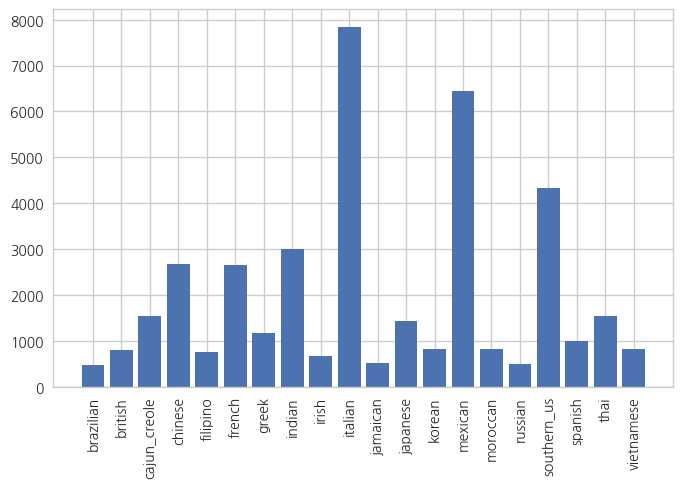

In [24]:
cuisines = sorted(Counter(recipe['cuisine'] for recipe in train).items(), key=lambda x: x[0])

plt.bar(range(len(cuisines)), [x[1] for x in cuisines], tick_label=[x[0] for x in cuisines])
plt.xticks(rotation='vertical')
plt.show()

In [25]:
def check_str(train, str_, default_cuisines=None):
    filtered = Counter([recipe['cuisine'] for recipe in train
                        if any(ingr for ingr in recipe['ingredients'] if str_ in ingr)])
    for cuisine in default_cuisines:
        if cuisine not in filtered.keys():
            filtered[cuisine] = 0
    return filtered

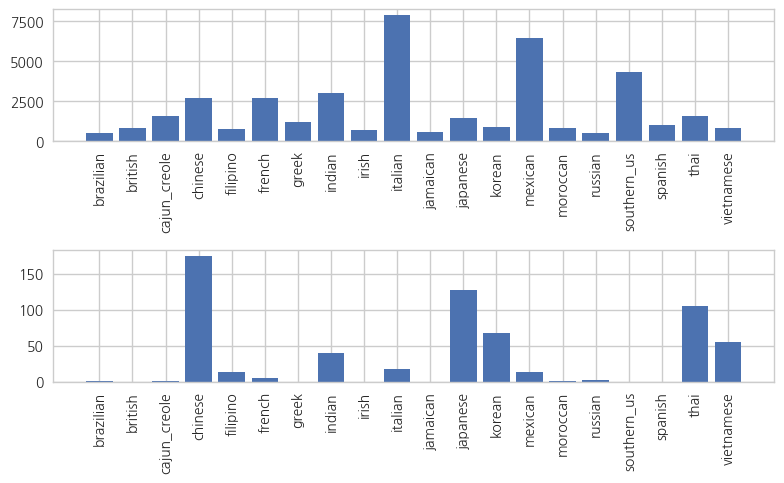

In [26]:
plt.subplot(211)
cuisines0 = sorted(Counter(recipe['cuisine'] for recipe in train).items(), key=lambda x: x[0])

plt.bar(range(len(cuisines0)), [x[1] for x in cuisines0], tick_label=[x[0] for x in cuisines0])
plt.xticks(rotation='vertical')


plt.subplot(212)
filtered_cuisines = check_str(train, str_='tofu', default_cuisines=[x[0] for x in cuisines0])
cuisines = sorted(filtered_cuisines.items(), key=lambda x: x[0])

plt.bar(range(len(cuisines)), [x[1] for x in cuisines], tick_label=[x[0] for x in cuisines])
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


In [27]:
cuisines.most_common()

AttributeError: 'list' object has no attribute 'most_common'

In [ ]:
ingr_dict = dict(ingr)

In [ ]:
Counter(ingr.values())

In [ ]:
len([x for x in ingr.values() if x >= 29])

In [ ]:
hist_max = 30

plt.hist(np.clip(list(ingr.values()), 1, hist_max), bins=range(1, hist_max+2), align='left')
plt.xticks(range(1, hist_max+1))
plt.show()

In [ ]:
import re

In [ ]:
special_chars = [x for x in ingr.items() if re.search(r'[^\w^\s^-]', x[0])]
len(special_chars), special_chars

In [28]:
sorted([x for x in ingr_train.items() if re.search(r'[^\w\s-]', x[0].lower())], key=lambda y: y[1], reverse=True)

[('half & half', 337),
 ('1% low-fat milk', 193),
 ('cream cheese, soften', 143),
 ('whole kernel corn, drain', 106),
 ('2% reduced-fat milk', 71),
 ('green bell pepper, slice', 49),
 ('roast red peppers, drain', 46),
 ("hellmann' or best food real mayonnais", 37),
 ('boneless, skinless chicken breast', 36),
 ('lasagna noodles, cooked and drained', 26),
 ("soft goat's cheese", 23),
 ('Country Crock® Spread', 21),
 ('frozen chopped spinach, thawed and squeezed dry', 21),
 ('clove garlic, fine chop', 20),
 ('uncook medium shrimp, peel and devein', 19),
 ('red kidnei beans, rins and drain', 18),
 ("I Can't Believe It's Not Butter!® Spread", 18),
 ('Bertolli® Classico Olive Oil', 16),
 ('dri oregano leaves, crush', 16),
 ('1% low-fat cottage cheese', 12),
 ('Old El Paso™ chopped green chiles', 12),
 ("hellmann' or best food light mayonnais", 12),
 ('(    oz.) tomato sauce', 11),
 ('egg noodles, cooked and drained', 11),
 ('Old El Paso™ taco seasoning mix', 11),
 ('water chestnuts, drained 

In [29]:
sorted([x for x in ingr_train.items() if re.search(r'konbu', x[0].lower())], key=lambda y: y[1], reverse=True)

[('konbu', 66)]

In [31]:
ingr_train

Counter({'romaine lettuce': 270,
         'black olives': 229,
         'grape tomatoes': 228,
         'garlic': 7380,
         'pepper': 4438,
         'purple onion': 1896,
         'seasoning': 137,
         'garbanzo beans': 148,
         'feta cheese crumbles': 358,
         'plain flour': 154,
         'ground pepper': 385,
         'salt': 18049,
         'tomatoes': 3058,
         'ground black pepper': 4785,
         'thyme': 361,
         'eggs': 3388,
         'green tomatoes': 108,
         'yellow corn meal': 341,
         'milk': 2263,
         'vegetable oil': 4385,
         'mayonaise': 781,
         'cooking oil': 483,
         'green chilies': 768,
         'grilled chicken breasts': 5,
         'garlic powder': 1442,
         'yellow onion': 1184,
         'soy sauce': 3296,
         'butter': 4848,
         'chicken livers': 65,
         'water': 7457,
         'wheat': 26,
         'black pepper': 2627,
         'shallots': 1477,
         'cornflour': 103,
       

In [33]:
import gensim

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [37]:
train1 = train[:100]

In [103]:
ingrs1 = [[i.lower() for i in recipe['ingredients']] for recipe in train1]
ingrs1_d = [{ingredient:1 for ingredient in recipe} for recipe in ingrs1]

In [98]:
ingrs1

[['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles'],
 ['plain flour',
  'ground pepper',
  'salt',
  'tomatoes',
  'ground black pepper',
  'thyme',
  'eggs',
  'green tomatoes',
  'yellow corn meal',
  'milk',
  'vegetable oil'],
 ['eggs',
  'pepper',
  'salt',
  'mayonaise',
  'cooking oil',
  'green chilies',
  'grilled chicken breasts',
  'garlic powder',
  'yellow onion',
  'soy sauce',
  'butter',
  'chicken livers'],
 ['water', 'vegetable oil', 'wheat', 'salt'],
 ['black pepper',
  'shallots',
  'cornflour',
  'cayenne pepper',
  'onions',
  'garlic paste',
  'milk',
  'butter',
  'salt',
  'lemon juice',
  'water',
  'chili powder',
  'passata',
  'oil',
  'ground cumin',
  'boneless chicken skinless thigh',
  'garam masala',
  'double cream',
  'natural yogurt',
  'bay leaf'],
 ['plain flour',
  'sugar',
  'butter',
  'eggs',
  'fresh ginger root',
  'salt',
  'ground 

In [86]:
cvec = CountVectorizer(token_pattern=r'^.*$')

In [99]:
dvec = DictVectorizer()

In [104]:
dvec = dvec.fit(ingrs1_d)

In [105]:
dvec.feature_names_

['1% low-fat milk',
 'all-purpose flour',
 'allspice',
 'almond extract',
 'amchur',
 'andouille sausage',
 'apple cider',
 'arrowroot powder',
 'asiago',
 'asian fish sauce',
 'avocado',
 'baby spinach leaves',
 'bacon',
 'bacon drippings',
 'bacon slices',
 'baking potatoes',
 'baking powder',
 'baking soda',
 'balsamic vinegar',
 'barley',
 'basil',
 'basmati rice',
 'bay leaf',
 'bay leaves',
 'beansprouts',
 'black mustard seeds',
 'black olives',
 'black pepper',
 'black peppercorns',
 'black-eyed peas',
 'blood orange',
 'boiling water',
 'boneless chicken skinless thigh',
 'boneless pork loin',
 'bread crumbs',
 'bread slices',
 'breakfast sausages',
 'broccoli',
 'broccolini',
 'broiler-fryer chicken',
 'brown sugar',
 'burger buns',
 'butter',
 'buttermilk',
 'cabbage',
 'cajun seasoning',
 'canned black beans',
 'canola oil',
 'capers',
 'cardamom pods',
 'carrots',
 'catfish fillets',
 'caul fat',
 'cauliflower',
 'cayenne',
 'cayenne pepper',
 'celery',
 'cheddar cheese',


In [107]:
ingrs1_mat = dvec.transform(ingrs1_d).toarray()

In [118]:
dvec_features = np.array(dvec.feature_names_)

In [119]:
ingrs1_0_indices = np.where(ingrs1_mat[0] == 1)

In [122]:
sorted(ingrs1[0])

['black olives',
 'feta cheese crumbles',
 'garbanzo beans',
 'garlic',
 'grape tomatoes',
 'pepper',
 'purple onion',
 'romaine lettuce',
 'seasoning']

In [123]:
ingrs1

[['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles'],
 ['plain flour',
  'ground pepper',
  'salt',
  'tomatoes',
  'ground black pepper',
  'thyme',
  'eggs',
  'green tomatoes',
  'yellow corn meal',
  'milk',
  'vegetable oil'],
 ['eggs',
  'pepper',
  'salt',
  'mayonaise',
  'cooking oil',
  'green chilies',
  'grilled chicken breasts',
  'garlic powder',
  'yellow onion',
  'soy sauce',
  'butter',
  'chicken livers'],
 ['water', 'vegetable oil', 'wheat', 'salt'],
 ['black pepper',
  'shallots',
  'cornflour',
  'cayenne pepper',
  'onions',
  'garlic paste',
  'milk',
  'butter',
  'salt',
  'lemon juice',
  'water',
  'chili powder',
  'passata',
  'oil',
  'ground cumin',
  'boneless chicken skinless thigh',
  'garam masala',
  'double cream',
  'natural yogurt',
  'bay leaf'],
 ['plain flour',
  'sugar',
  'butter',
  'eggs',
  'fresh ginger root',
  'salt',
  'ground 

In [120]:
dvec_features[ingrs1_0_indices[0]]

array(['black olives', 'feta cheese crumbles', 'garbanzo beans', 'garlic',
       'grape tomatoes', 'pepper', 'purple onion', 'romaine lettuce',
       'seasoning'],
      dtype='<U37')

In [87]:
cvec = cvec.fit(ingrs1)

AttributeError: 'list' object has no attribute 'lower'

In [71]:
cvec.transform(ingrs1).toarray().sum()

985